# Constitutive Law data generator

To allow inline pictures, run the following block

In [1]:
%matplotlib inline

Import the useful libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
colors = ['red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black']

## Parameters of the Constitutive law

In [3]:
# These are the coefficients of the Constitutive law
A = 806
B = 614
C = 0.0089
n = 0.168
m = 1.1
T0 = 20
Tm = 1540
epsp0 = 1

Parameters of the curves to generate

In [4]:
num_eps = 70                                        # Number of points on the x axis
eps = np.linspace(0, 1, num_eps)                    # Strain ranges from 0 to 1
epsp = np.array([1, 10, 50, 500, 5000, 50000])      # Strain rate values
temp = np.array([20, 100, 200, 300, 400, 500])      # Temperature values

Definition of the Johnson-Cook constitutive law

In [5]:
def constitutiveLaw(eps, epsp, T, A, B, C, n, m):
    return (A + B * eps**n) * (1 + C * np.log(epsp / epsp0)) * (1 - ((T - T0) / (Tm - T0))**m)

def constitutiveLawEps(eps, epsp, T, A, B, C, n, m):
    return (n * B * eps**(-1+n)) * (1 + C * np.log(epsp / epsp0)) * (1 - ((T - T0) / (Tm - T0))**m)

def constitutiveLawEpsp(eps, epsp, T, A, B, C, n, m):
    return C * (A + B * eps**n) * (1 - ((T - T0) / (Tm - T0))**m) / epsp

def constitutiveLawT(eps, epsp, T, A, B, C, n, m):
    return - ((A + B * eps**n) * (1 + C * np.log(epsp / epsp0)) * m * ((T - T0) / (Tm - T0))**(-1+m)) / (Tm - T0)


## Main data generation

Generation of Data

In [6]:
Tables = []
for T in temp:
    johnsonCook = eps
    for epspi in epsp:
        sig = constitutiveLaw(eps, epspi, T, A, B, C, n, m)
        johnsonCook = np.vstack((johnsonCook, sig))
    Tables.append(johnsonCook.T)    

Plot the data to see how it looks like

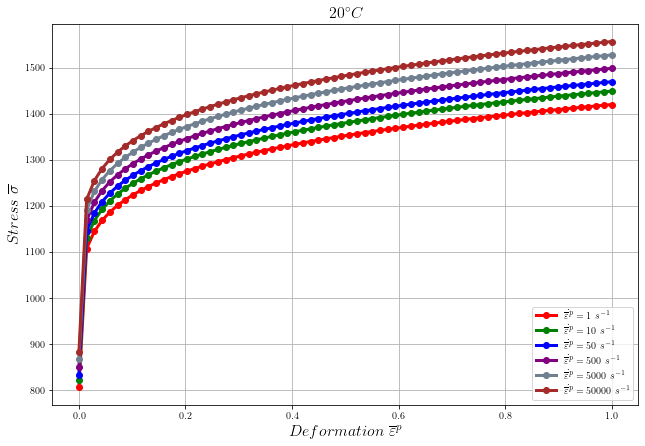

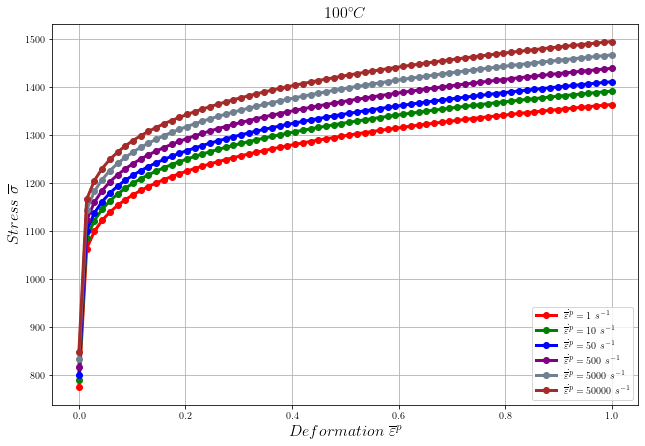

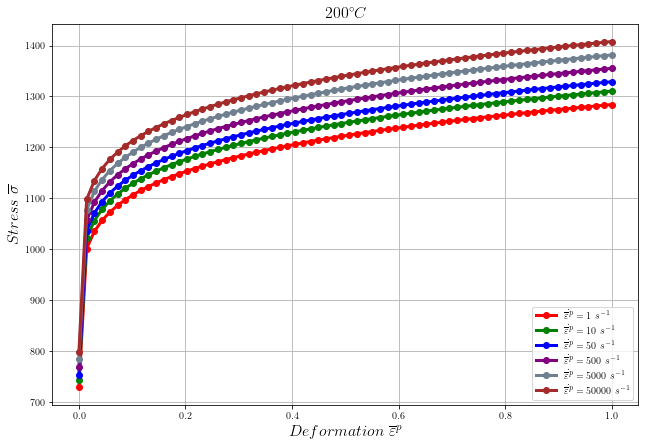

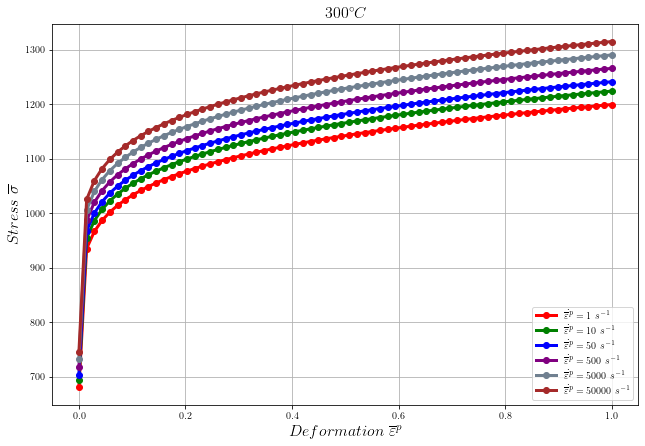

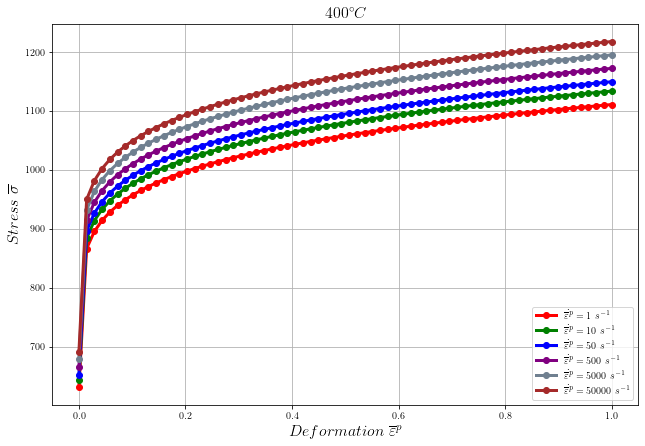

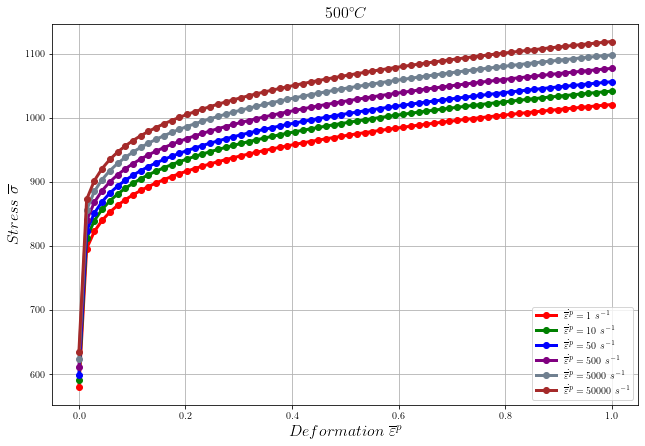

In [7]:
idx = 1
for table in range(len(Tables)):
    plt.figure(figsize = (10.5, 7))
    plt.rc('text', usetex = True)
    johnsonCook = Tables[table]
    # Plot the curves
    for column in range(1, johnsonCook.shape[1]):
        plt.plot(johnsonCook[:,0], johnsonCook[:,column], colors[column-1],
            label=r'$\dot{\overline{\varepsilon}^p}=' + str(epsp[column-1]) + '\ s^{-1}$', marker = 'o',linewidth = 3)
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(temp[idx-1]) + '^{\circ}C$', fontsize = 16) # Self explicit command
#    plt.savefig('OriginalData'+str(temp[idx-1])+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    idx += 1

Convert Array to Panda Data

In [8]:
data = []
for table in range(len(Tables)):
    # convert your array into a dataframe
    df = pd.DataFrame (Tables[table])

    # Name the columns
    for c in range(len(epsp)):
        df.rename(columns={c+1:epsp[c]}, inplace=True)
    df.rename(columns={0:'epsilon'}, inplace=True)
    data.append(df)

Export data to Excel file

In [9]:
# save to xlsx file
writer = pd.ExcelWriter('JC-Experiments.xlsx', engine='xlsxwriter')
for table in range(len(Tables)):
    data[table].to_excel(writer, index=False, sheet_name= str(temp[table])+'°C')
writer.save()

## Generation of test data

In [10]:
dataPoints = 5000
testData = np.empty((0, 4))

for test in range(dataPoints):
    Eps = np.random.uniform(eps.min()+0.05,eps.max()*0.95)
    Epsp = np.random.uniform(epsp.min()*1.05,epsp.max()*0.95)
    T = np.random.uniform(temp.min()*1.05,temp.max()*0.95)
    sig = constitutiveLaw(Eps, Epsp, T, A, B, C, n, m)
    newrow = np.array([Eps, Epsp, T, sig])
    testData = np.vstack([testData, newrow])
    #print(Eps, Epsp, T, sig)

In [11]:
np.savez("Datatest", testData = testData)

In [12]:
dataPoints = 5000
testData = np.empty((0, 7))

for test in range(dataPoints):
    Eps = np.random.uniform(eps.min()+0.05,eps.max()*0.95)
    Epsp = np.random.uniform(epsp.min()*1.05,epsp.max()*0.95)
    T = np.random.uniform(temp.min()*1.05,temp.max()*0.95)
    sig = constitutiveLaw(Eps, Epsp, T, A, B, C, n, m)
    sigEps = constitutiveLawEps(Eps, Epsp, T, A, B, C, n, m)
    sigEpsp = constitutiveLawEpsp(Eps, Epsp, T, A, B, C, n, m)
    sigT = constitutiveLawT(Eps, Epsp, T, A, B, C, n, m)
    newrow = np.array([Eps, Epsp, T, sig, sigEps, sigEpsp, sigT])
    testData = np.vstack([testData, newrow])
    #print(Eps, Epsp, T, sig)

In [13]:
np.savez("DatatestWithDerivatives", testData = testData)